In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
!wget https://aqs.epa.gov/aqsweb/airdata/hourly_42602_2017.zip
!unzip hourly_42602_2017.zip

--2020-12-18 12:27:56--  https://aqs.epa.gov/aqsweb/airdata/hourly_42602_2017.zip
Resolving aqs.epa.gov (aqs.epa.gov)... 134.67.21.26
Connecting to aqs.epa.gov (aqs.epa.gov)|134.67.21.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28265816 (27M) [application/zip]
Saving to: ‘hourly_42602_2017.zip’

hourly_42602_2017.z 100%[===================>]  26.96M   201KB/s    in 2m 28s  

2020-12-18 12:30:25 (187 KB/s) - ‘hourly_42602_2017.zip’ saved [28265816/28265816]

Archive:  hourly_42602_2017.zip
  inflating: hourly_42602_2017.csv   


In [3]:
!ls -l

total 1784672
-rw-r--r--  1 kollin  staff         97 Dec 18 12:24 NOTES.md
-rw-r--r--  1 kollin  staff       1820 Dec 18 12:31 Untitled.ipynb
-rw-r--r--  1 kollin  staff  885473507 Nov 25 11:35 hourly_42602_2017.csv
-rw-r--r--  1 kollin  staff   28265816 Dec  1 20:11 hourly_42602_2017.zip


In [4]:
!ls -l

total 1784672
-rw-r--r--  1 kollin  staff         97 Dec 18 12:24 NOTES.md
-rw-r--r--  1 kollin  staff       1820 Dec 18 12:31 air_quality.ipynb
-rw-r--r--  1 kollin  staff  885473507 Nov 25 11:35 hourly_42602_2017.csv
-rw-r--r--  1 kollin  staff   28265816 Dec  1 20:11 hourly_42602_2017.zip


In [5]:
aq_data = pd.read_csv('./hourly_42602_2017.csv')

/Users/kollin/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
aq_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
1,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
2,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
3,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19
4,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,0.1,NaN,NaN,FEM,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,Alabama,Jefferson,2017-04-19


In [7]:
aq_data.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Measurement',
       'Units of Measure', 'MDL', 'Uncertainty', 'Qualifier', 'Method Type',
       'Method Code', 'Method Name', 'State Name', 'County Name',
       'Date of Last Change'],
      dtype='object')

In [8]:
aq_data['Sample Measurement'].describe()

count    3.561691e+06
mean     8.242666e+00
std      9.165297e+00
min     -5.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.120000e+01
max      1.296000e+02
Name: Sample Measurement, dtype: float64

In [9]:
aq_data['Site Num'].unique()

array([  23, 2059,   34,   19, 3002, 4011, 4019, 4020, 9997, 1011, 1028,
          5,    7,    9,   11,   12,   13, 2005,    8,    2, 1002, 1004,
       2007,  242, 2016, 4001, 5001, 1005, 1003,   14, 2012, 6001,   16,
        113, 1103, 1201, 1302, 1602, 1701, 4006, 4008, 5005, 6012, 9033,
          4,    1,    3,    6, 1016, 8001, 8005, 9001,   10,   15,   26,
         27,  306, 1234, 2002, 9004, 1006, 1008, 1014, 1017, 1022, 3005,
       4002, 8002, 1001, 1013, 1018, 1021, 1025, 2004, 2011, 4003, 3001,
       7004,   28, 7001, 7003, 9003,   25,   41,   43,   50,   51,   35,
         32,  108, 1065,   21,   18,   56,   63,   76, 3103,   22,   78,
         87,   30,   17,   67,   75, 1024, 1100,   29,   40, 2006, 4005,
       3003,   42,   44,   93,   94,   95, 1010,   20,  423,  480,  962,
         85,   86,  760,  761,  762,  540,  561, 1501, 1502, 1233,  110,
        133,  124,  125,   45,   60,   73,   37,   38,   48,  101,   65,
         33,   97, 9021, 1127,   80, 1376,  100, 40

In [10]:
aq_data.loc[aq_data['State Name'] == "California"]['Site Num'].unique().shape

(66,)

In [11]:
los_angeles_aq = aq_data.loc[ \
                     (aq_data['Longitude'] > -118.455937) & \
                     (aq_data['Longitude'] < -117.842111) & \
                     (aq_data['Latitude'] > 33.764836) & \
                     (aq_data['Latitude'] < 34.173729) ]
los_angeles_aq

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
308750,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308751,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308752,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308753,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
308754,6,37,2,42602,2,34.13650,-117.92391,WGS84,Nitrogen dioxide (NO2),2017-01-01,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Los Angeles,2017-06-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494138,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20
494139,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20
494140,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20
494141,6,59,5001,42602,2,33.92513,-117.95264,WGS84,Nitrogen dioxide (NO2),2017-12-30,...,Parts per billion,1.0,NaN,NaN,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Orange,2018-02-20


In [12]:
los_angeles_aq_trimmed = los_angeles_aq[['Latitude','Longitude','Date Local','Time Local','Site Num','Sample Measurement','State Name']]
los_angeles_aq_trimmed.head()

,Latitude,Longitude,Date Local,Time Local,Site Num,Sample Measurement,State Name
308750,34.1365,-117.92391,2017-01-01,00:00,2,14.4,California
308751,34.1365,-117.92391,2017-01-01,01:00,2,12.9,California
308752,34.1365,-117.92391,2017-01-01,02:00,2,15.2,California
308753,34.1365,-117.92391,2017-01-01,03:00,2,13.6,California
308754,34.1365,-117.92391,2017-01-01,04:00,2,15.2,California


In [13]:
los_angeles_aq_trimmed['Timestamp'] = pd.to_datetime((los_angeles_aq_trimmed['Date Local']+ ' ' + los_angeles_aq_trimmed['Time Local']),format='%Y-%m-%d %H:%M').values.astype(np.int64)
# add name of day of week
los_angeles_aq_trimmed['Weekday'] = pd.to_datetime(los_angeles_aq_trimmed['Date Local']).dt.weekday_name

los_angeles_aq_trimmed.head()

<ipython-input-13-7485caab6ac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los_angeles_aq_trimmed['Timestamp'] = pd.to_datetime((los_angeles_aq_trimmed['Date Local']+ ' ' + los_angeles_aq_trimmed['Time Local']),format='%Y-%m-%d %H:%M').values.astype(np.int64)


AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [14]:
import datetime as dt

# foo = ((los_angeles_aq['Date Local'].astype(str) + " " + los_angeles_aq['Time Local']) - dt.datetime(1970,1,1)).dt.total_seconds()
# los_angeles_aq['Timestamp'] = (pd.to_datetime((los_angeles_aq['Date Local'].astype(str) + "-" + los_angeles_aq['Time Local']))).dt.total_seconds()
los_angeles_aq['Timestamp'] = (pd.to_datetime((los_angeles_aq['Date Local'].astype(str) + "-" + los_angeles_aq['Time Local'])) - dt.datetime(1970,1,1)).dt.total_seconds()
# .date.astype('int64')

# los_angeles_aq['Date']

<ipython-input-14-58fde43e7a90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los_angeles_aq['Timestamp'] = (pd.to_datetime((los_angeles_aq['Date Local'].astype(str) + "-" + los_angeles_aq['Time Local'])) - dt.datetime(1970,1,1)).dt.total_seconds()


In [15]:
los_angeles_aq['Timestamp']

308750    1.483229e+09
308751    1.483232e+09
308752    1.483236e+09
308753    1.483240e+09
308754    1.483243e+09
              ...     
494138    1.514664e+09
494139    1.514668e+09
494140    1.514671e+09
494141    1.514675e+09
494142    1.514678e+09
Name: Timestamp, Length: 101620, dtype: float64

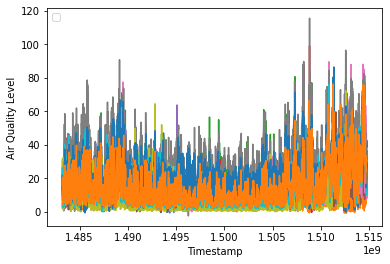

In [16]:
plt.ylabel('Air Quality Level')
plt.xlabel('Timestamp')
plt.legend( los_angeles_aq['Site Num'].unique().tolist(), loc='upper left')
# plt.legend( los_angeles_aq['Site Num'].unique().tolist() )
# colors = [plt.cm.spectral(i) for i in np.linspace(0, 1, los_angeles_aq['Site Num'].unique().shape[0])]
# ax.set_prop_cycle('color', colors)
los_angeles_aq_trimmed = los_angeles_aq
for site in los_angeles_aq['Site Num'].unique():
    plt.plot( los_angeles_aq_trimmed.loc[los_angeles_aq_trimmed['Site Num'] == site]['Timestamp'], los_angeles_aq_trimmed.loc[los_angeles_aq_trimmed['Site Num'] == site]['Sample Measurement'])

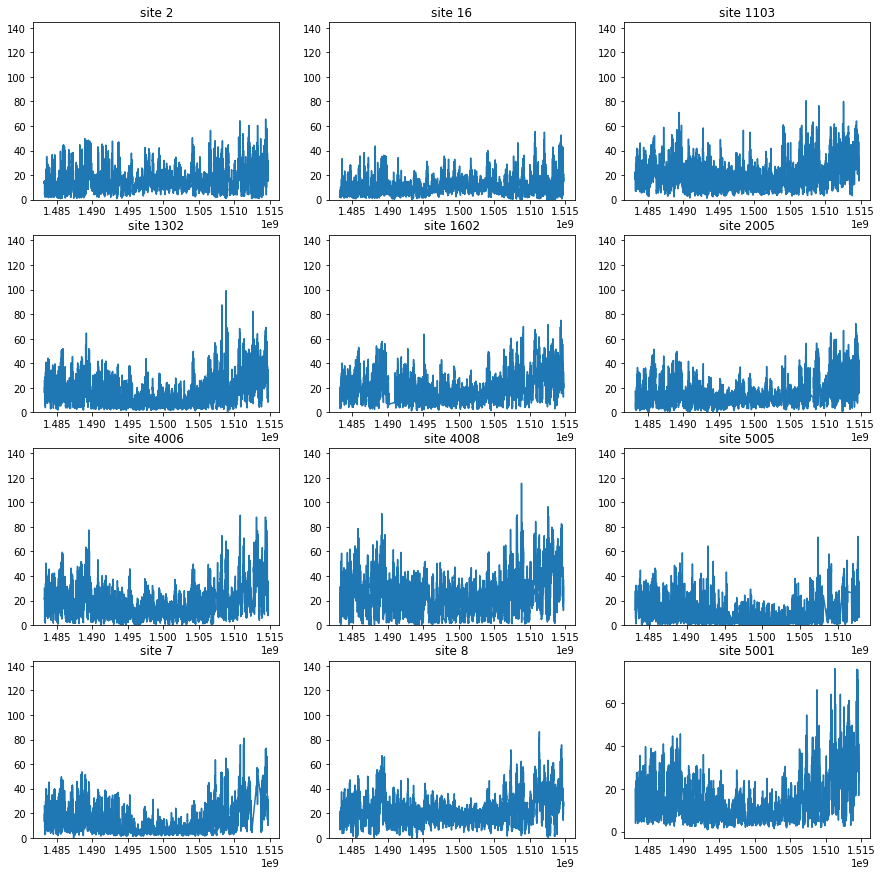

In [17]:
# Print aq changes throughout the year, and create a seperate chart for each air quality monitoring site
ncols = 3
nrows = 4 #los_angeles_aq['Site Num'].unique().shape[0]
plt.subplots(nrows, ncols, figsize=(15,15))
idx = 1
data_summary = los_angeles_aq['Sample Measurement'].describe()
for site in los_angeles_aq['Site Num'].unique():
    plt.ylim(0, data_summary['max'] * 1.25)
    plt.subplot(nrows, ncols, idx)
    plt.plot( los_angeles_aq.loc[los_angeles_aq['Site Num'] == site]['Timestamp'], los_angeles_aq.loc[los_angeles_aq['Site Num'] == site]['Sample Measurement'])
    plt.title("site " + str(site))
    idx = idx + 1

In [18]:
# extract day of week
import datetime
los_angeles_aq['Weekday'] = pd.to_datetime(los_angeles_aq['Date Local']).dt.day_name()

<ipython-input-18-3b7c504c715a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los_angeles_aq['Weekday'] = pd.to_datetime(los_angeles_aq['Date Local']).dt.day_name()


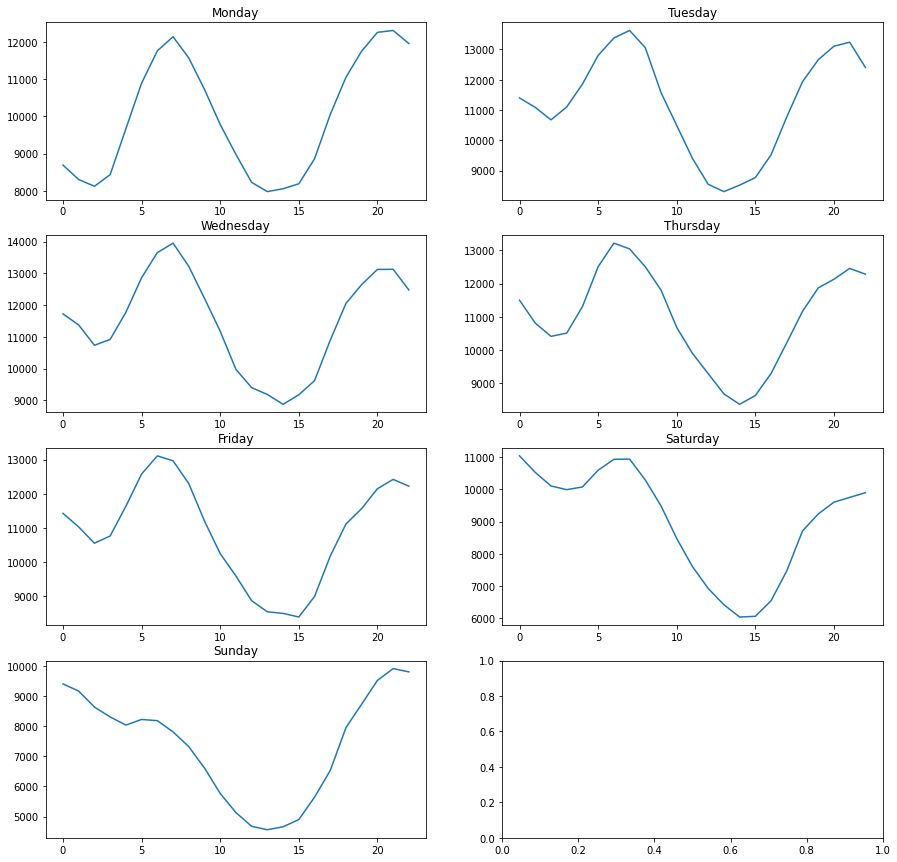

In [19]:
# Print aq changes throughout the day from 0:00 - 24:00. Break into seperate plots by weekday
nrows = 4
ncols = 2
plt.subplots(nrows, ncols, figsize=(15,15))
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
idx = 1
values_by_weekday = {}
for day in weekdays:
    plt.subplot(nrows, ncols, idx)
    # for loop 0:00 - 24:00
    # sum measurements where weekday == and time ==
    times = []
    for hour in range(0, 23):
        if hour <= 9:
          time = "0" + str(hour) + ":00"
        else:
          time = str(hour) + ":00"
        # select subset matching given weekday and hour
        subset = los_angeles_aq.loc[ (los_angeles_aq['Weekday'] == day) & (los_angeles_aq['Time Local'] == time) ]['Sample Measurement']
        #         print(subset.mean())
        times.append(subset.sum())
    values_by_weekday[day] = times
    plt.plot( times )
    plt.title(day)
    idx = idx + 1